In [9]:
from matplotlib import pyplot as plt
import matplotlib.patches as patches
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.optimize import curve_fit
from scipy.stats import norm, t, skewnorm

sns.set()

In [2]:
df = pd.read_csv(
    "../data/WSA_DATA/UNCERTAINTY/KNN_DATASET/AGONG/R000/AGONG_ACE_daysahead3_R000_knn_dataset.csv",
    index_col=0,
)
df.index = pd.to_datetime(df.index)
df.head()

,Vp_pred,Vp_obs
2010-01-03 18:00:00,365.40,290.97
2010-01-04 00:00:00,354.50,305.76
2010-01-04 06:00:00,343.60,298.70
2010-01-04 12:00:00,347.54,285.85
2010-01-04 18:00:00,316.15,257.63


In [3]:
errors = df.Vp_pred - df.Vp_obs
errors = errors[np.isfinite(errors)]

In [4]:
bins = np.arange(-400, 405, 10)
bin_centers = bins[:-1] + 0.5 * np.diff(bins)
error_pdf, _ = np.histogram(errors, bins=bins, density=True)

In [5]:
def gaussian_model(x, A, c):
    return A * np.exp(-((x / c) ** 2))


p0 = [1.0, np.var(errors)]
bounds = ([0, 1e-3], [np.inf, np.inf])  # constrain c>0, reasonable d range
params, cov = curve_fit(
    gaussian_model, bin_centers, error_pdf, p0=p0, bounds=bounds, maxfev=10000
)
A_fit, c_fit = params
gaussian_pdf = gaussian_model(bin_centers, A_fit, c_fit)

In [28]:
def draw_circle(ax, center, width, height, circle_color="red"):
    ellipse = patches.Ellipse(
        xy=center,
        width=width,
        height=height,
        angle=0,
        facecolor=(1, 0, 0, 0),
        edgecolor="red",
        lw=1,
    )
    ax.add_patch(ellipse)

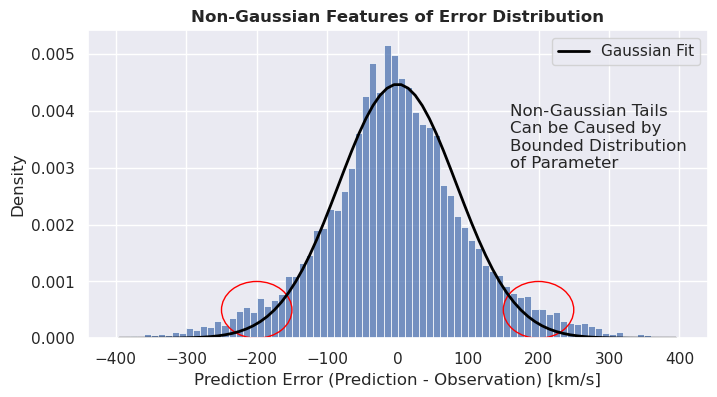

In [44]:
# Gaussian
plt.figure(figsize=(8, 4))
sns.histplot(errors, bins=bins, stat="density")
plt.plot(bin_centers, gaussian_pdf, color="black", lw=2, label=f"Gaussian Fit")
plt.xlabel("Prediction Error (Prediction - Observation) [km/s]")
draw_circle(plt.gca(), (200, 0.0005), 100, 0.001)
draw_circle(plt.gca(), (-200, 0.0005), 100, 0.001)

plt.title("Non-Gaussian Features of Error Distribution", fontweight="bold")
plt.text(
    160,
    0.003,
    "Non-Gaussian Tails\nCan be Caused by\nBounded Distribution\nof Parameter",
)
plt.legend(loc="upper right")